In [9]:
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [10]:
batch_size=256
#定义数据转换的格式
trans=torchvision.transforms.ToTensor()
#读取数据
#root指定数据下载的内存地址
mnist_train=torchvision.datasets.FashionMNIST(root="../datasets/FashionMnist",train=True,transform=trans,download=True)
mnist_test=torchvision.datasets.FashionMNIST(root="../datasets/FashionMnist",train=False,transform=trans,download=True)
def get_dataloader_workers():
    return 2
def load_data_fashion_mnist(batch_size,resize=None):
    return (torch.utils.data.DataLoader(mnist_train,batch_size,shuffle=True,
                           num_workers=get_dataloader_workers()),
           torch.utils.data.DataLoader(mnist_test,batch_size,shuffle=True,
                           num_workers=get_dataloader_workers()))
batch_size=256
train_iter,test_iter= load_data_fashion_mnist(batch_size)

In [11]:
#定义一个具有单隐藏层的多层感知机，包含256个隐藏单元
num_inputs,num_outputs,num_hiddens=784,10,256
#这里的W1不是针对某层中一个神经元的参数，而是整个层的W参数
#num_inputs对应的是每个神经元处理的输入的特征个数，
#num_hidden对应的是一共有多少个神经元输出处理后的特征个数
W1=nn.Parameter(
    torch.randn(num_inputs,num_hiddens,requires_grad=True))
b1=nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2=nn.Parameter(
    torch.randn(num_hiddens,num_outputs,requires_grad=True))
b2=nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

params=[W1,b1,W2,b2]

In [12]:
#实现relu激活函数
def relu(X):
    a=torch.zeros_like(X)
    return torch.max(X,a)

#实现模型
def net(X):
    X = X.reshape((-1,num_inputs))
    H = relu(X @ W1+b1)
    return (H @ W2+b2)

loss=nn.CrossEntropyLoss(reduction='none')

RuntimeError: DataLoader worker (pid(s) 21448, 20164) exited unexpectedly

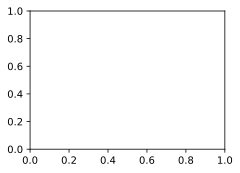

In [13]:
num_epochs,learningrate=10,0.1
updater=torch.optim.SGD(params,lr=learningrate)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)